<a href="https://colab.research.google.com/github/ssafreed/pytorch/blob/main/MNIST_Classifier_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Convert MNIST Image files into a Tensor of 4-Dimension (# of images, Height, Width, Color)
transform = transforms.ToTensor()

In [5]:
# Data
train_data = datasets.MNIST(root='/content/MNIST_Data/', train=True, download=True, transform=transform)

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 131MB/s]

Extracting /content/MNIST_Data/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST_Data/MNIST/raw



Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 23.4MB/s]


Extracting /content/MNIST_Data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST_Data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 110MB/s]


Extracting /content/MNIST_Data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST_Data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.96MB/s]


Extracting /content/MNIST_Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST_Data/MNIST/raw



In [6]:
# Test Data
test_data = datasets.MNIST(root='/content/MNIST_Data/', train=False, download=True, transform=transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/MNIST_Data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/MNIST_Data/
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
batch_size = 10
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [10]:
# Model Class
class ConvlutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3,stride=1,padding=1)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3,stride=1,padding=1)
    self.fc1 = nn.Linear(7*7*16, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, X):
    #  First Pass
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2,2)
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2,2)
    # Flatten
    X = X.view(-1, 16*7*7)
    # Fully connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)


In [12]:
torch.manual_seed(41)
model = ConvlutionalNetwork()
model

ConvlutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [15]:
import time
start_time = time.time()

#Create variables to Track Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


# For Loop of epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print results
    if b%500 == 0:
      print(f'Epoch: {i} Batch {b} Loss : {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Test
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()


  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total_time = current_time - start_time
print(f'Time took : {total_time/60} mins')

Epoch: 0 Batch 500 Loss : 0.005675832740962505
Epoch: 0 Batch 1000 Loss : 0.0228220596909523
Epoch: 0 Batch 1500 Loss : 0.021696772426366806
Epoch: 0 Batch 2000 Loss : 0.01416311226785183
Epoch: 0 Batch 2500 Loss : 0.018629617989063263
Epoch: 0 Batch 3000 Loss : 0.005117711611092091
Epoch: 0 Batch 3500 Loss : 0.007272833026945591
Epoch: 0 Batch 4000 Loss : 0.1495463103055954
Epoch: 0 Batch 4500 Loss : 0.006781361065804958
Epoch: 0 Batch 5000 Loss : 0.12061446905136108
Epoch: 0 Batch 5500 Loss : 0.002496306085959077
Epoch: 0 Batch 6000 Loss : 0.23690514266490936
Epoch: 1 Batch 500 Loss : 0.0009183529764413834
Epoch: 1 Batch 1000 Loss : 0.15876300632953644
Epoch: 1 Batch 1500 Loss : 0.007075208239257336
Epoch: 1 Batch 2000 Loss : 0.011188434436917305
Epoch: 1 Batch 2500 Loss : 0.00014559825649484992
Epoch: 1 Batch 3000 Loss : 0.00023118426906876266
Epoch: 1 Batch 3500 Loss : 0.07049112766981125
Epoch: 1 Batch 4000 Loss : 0.05168731138110161
Epoch: 1 Batch 4500 Loss : 0.01607862114906311


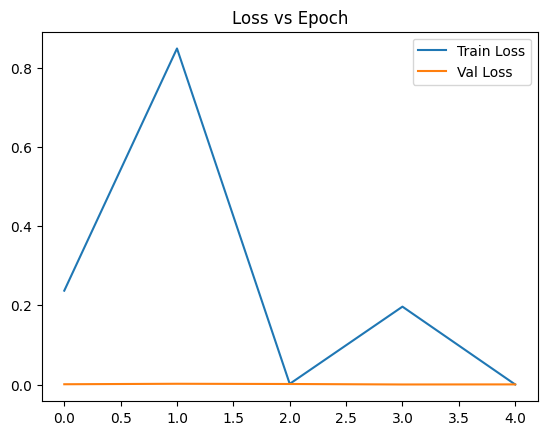

In [16]:
# Graph the loss
# convert the Tensor to list
train_losses = [t1.item() for t1 in train_losses]
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Val Loss')
plt.title('Loss vs Epoch')
plt.legend()

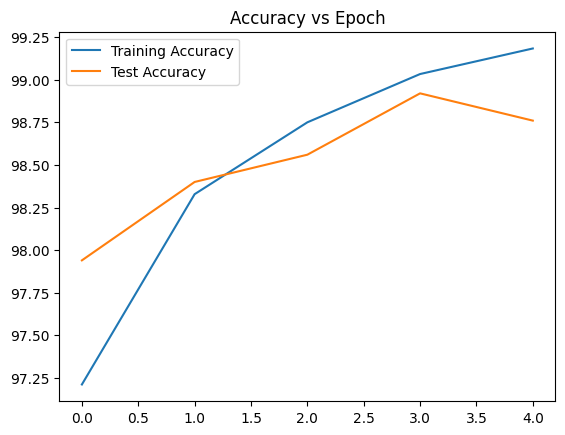

In [17]:
# Graph the Accuracy
plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/100 for t in test_correct], label='Test Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()

In [19]:
test_load_everything = DataLoader(test_data, batch_size= 10000, shuffle=False)

In [20]:
with torch.no_grad():
  correct = 0
  for x_test, y_test in test_load_everything:
    y_val = model(x_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [21]:
correct.item()/len(test_data) * 100

98.76

In [22]:
# Grab an Image
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [23]:
# Grab Just data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [24]:
# Reshape
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

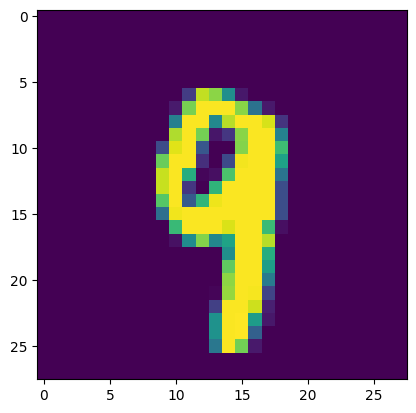

In [25]:
plt.imshow(test_data[4143][0].reshape(28,28))

In [26]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28))      # Batch size 1, 1 color channel and 28x28 image

In [27]:
new_prediction

tensor([[-2.9310e+01, -2.2103e+01, -2.6143e+01, -2.1743e+01, -1.3849e+01,
         -2.0214e+01, -3.3801e+01, -1.9618e+01, -1.7509e+01, -9.5367e-07]])

In [28]:
new_prediction.argmax()

tensor(9)

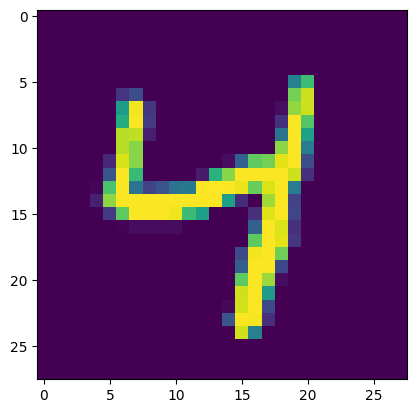

In [29]:
plt.imshow(test_data[1978][0].reshape(28,28))

In [30]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[1978][0].view(1,1,28,28))      # Batch size 1, 1 color channel and 28x28 image

In [31]:
new_prediction.argmax()

tensor(4)

In [32]:
# Save the MNIST Classifier

torch.save(model.state_dict(), 'My_MNIST_classifier.pt')

In [34]:
# Load the saved Model
new_model = ConvlutionalNetwork()
new_model.load_state_dict(torch.load('My_MNIST_classifier.pt'))

<ipython-input-34-1f93002d916d>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('My_MNIST_classifier.pt'))


<All keys matched successfully>

In [35]:
new_model.eval()

ConvlutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)